<a href="https://colab.research.google.com/github/babuus/Identity-and-Emotion-detection/blob/master/Notebook/Face_Data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mtcnn
!pip install bing_image_downloader

     |████████████████████████████████| 2.3 MB 4.3 MB/s 
     |████████████████████████████████| 904 kB 4.2 MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=dab0ffffb7aaacde1681ee5953bfcf8db0b292f07acb248ff2d51ead4607f505
  Stored in directory: /root/.cache/pip/wheels/e3/98/42/0d3a76d46cd5a6659afb2f5612d4908ca42d34060973d46727
Successfully built google-images-download


In [ ]:
from mtcnn import MTCNN
import cv2 as cv
# import numpy as np
import matplotlib.pyplot as plt
import shutil, os

In [3]:
#Bing
from bing_image_downloader import downloader
# downloader.download("happy human face", limit=1000,  output_dir='dataset', 
#                     adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("sleeping on desk", limit=1000,  output_dir='dataset', 
                    adult_filter_off=True, force_replace=False, timeout=60)
# downloader.download("human neutral emotions", limit=1000,  output_dir='dataset', 
#                     adult_filter_off=True, force_replace=False, timeout=60)
# downloader.download("sad human faces", limit=1000,  output_dir='dataset', 
#                     adult_filter_off=True, force_replace=False, timeout=60)
# downloader.download("fear human face", limit=1000,  output_dir='dataset', 
#                     adult_filter_off=True, force_replace=False, timeout=60)

[%] Downloading Images to /content/dataset/sleeping on desk


[!!]Indexing page: 1

[%] Indexed 156 Images on Page 1.


[%] Downloading Image #1 from https://health.clevelandclinic.org/wp-content/uploads/sites/3/2015/08/child-sleep-iStock_000020435433_Large.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://truevoices.com/wp-content/uploads/2013/02/Woman-Sleeping-At-Desk_BORDERS.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://myfrenchphysio.london/wp-content/uploads/2017/09/man-sleeping-on-desk-500.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.aappublications.org/news/aapnewsmag/2016/11/03/Sleep110316/media/image1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.sleepwellconsulting.ca/isl/uploads/2017/06/bigstock-Tired-man-sleeping-at-home-hav-184212676.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://cdn.mamamia.com.au/wp/wp-content/uploads/2016/03/31042313/woman-asleep-desk-01.jpg
[%] File Download

In [ ]:
detector = MTCNN()

[{'box': [18, 0, 584, 743], 'confidence': 0.9867247343063354, 'keypoints': {'left_eye': (181, 235), 'right_eye': (471, 247), 'nose': (326, 476), 'mouth_left': (202, 568), 'mouth_right': (432, 579)}}]


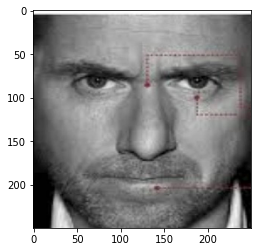

In [ ]:
img = cv.cvtColor(cv.imread("/content/dataset/human Fear emotions/Image_115.jpg"), cv.COLOR_BGR2RGB)
# img = cv.imread("/content/dataset/human sad emotions/Image_106.jpg")
# cv.imshow("frame", img)
mtcnn_img =  detector.detect_faces(img)
print(mtcnn_img)
x1, y1, width, height = mtcnn_img[0]['box']
x2, y2 = x1 + width, y1 + height

face = img[y1:y2, x1:x2]
name = "/content/sad/sad%d.jpg"%count
cv.imwrite(name, cv.resize(face, (250,250)))
plt.imshow(cv.resize(face, (250,250)))

In [ ]:
def face_filter(path, valid_images, name):
  imgs, face, face_name  = [], [], []
  count=0
  for f in os.listdir(path):
      ext = os.path.splitext(f)[1]
      if ext.lower() not in valid_images:
          continue
      #imgs path
      # imgs.append(os.path.join(path,f))
      # print(f)
      # img = cv.cvtColor(cv.imread(os.path.join(path,f)), cv.COLOR_BGR2RGB)
      img = cv.imread(os.path.join(path,f))
      mtcnn_img =  detector.detect_faces(img)
      # mtcnn_img
      print(mtcnn_img)
      if mtcnn_img != []:
      #   shutil.copy(os.path.join(path,f), '/content/sad')
        # plt.imshow(img)
        x1, y1, width, height = mtcnn_img[0]['box']
        x2, y2 = x1 + width, y1 + height

        face = img[y1:y2, x1:x2]
        name = "./Emotions_downloaded/happy/sad%d.jpg"%count
        # name = "/content/"+name+"/"+name+"%d.jpg"%count
        cv.imwrite(name, cv.resize(face, (250,250)))
      # print(count)
      # cv.imshow("frame", face)
      # cv.imwrite("C:/Users/usbab/Desktop/AI CWEM/Images/"+str(count)+".jpg", face)
        count = count + 1
  cou

In [ ]:
sad = "./Emotions_downloaded/sad human faces"
happy = "./Emotions_downloaded/happy human face"
neutral = "./Emotions_downloaded/human neutral emotions"
angry = "./Emotions_downloaded/angry human face"
fear = "./Emotions_downloaded/fear human face"
valid_images = [".jpg",".png", "jfif"]

# face_filter(sad, valid_images, name="sad")
face_filter(happy, valid_images, name="happy")
# face_filter(neutral, valid_images, name="neutral")
# face_filter(angry, valid_images, name="angry")
# face_filter(fear, valid_images, name="fear")

In [5]:
!tar -cvf "sleeping on desk.tar" "/content/dataset/sleeping on desk"

tar: Removing leading `/' from member names
/content/dataset/sleeping on desk/
/content/dataset/sleeping on desk/Image_726.jpg
/content/dataset/sleeping on desk/Image_613.jpg
/content/dataset/sleeping on desk/Image_344.jpg
/content/dataset/sleeping on desk/Image_556.jpg
/content/dataset/sleeping on desk/Image_559.jpg
/content/dataset/sleeping on desk/Image_56.png
/content/dataset/sleeping on desk/Image_35.jpg
/content/dataset/sleeping on desk/Image_899.jpg
/content/dataset/sleeping on desk/Image_406.jpg
/content/dataset/sleeping on desk/Image_120.jpg
/content/dataset/sleeping on desk/Image_944.jpg
/content/dataset/sleeping on desk/Image_558.jpg
/content/dataset/sleeping on desk/Image_993.jpg
/content/dataset/sleeping on desk/Image_89.jpg
/content/dataset/sleeping on desk/Image_990.jpg
/content/dataset/sleeping on desk/Image_94.jpg
/content/dataset/sleeping on desk/Image_4.jpg
/content/dataset/sleeping on desk/Image_968.gif
/content/dataset/sleeping on desk/Image_347.gif
/content/datase

In [ ]:
rm -rf sad